In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train

11490434/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
import matplotlib.pyplot as plt


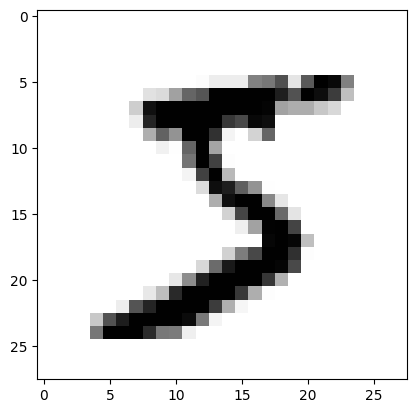

In [5]:
plt.imshow(x_train[0],plt.get_cmap('binary'))

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [9]:
# Visualize the Images


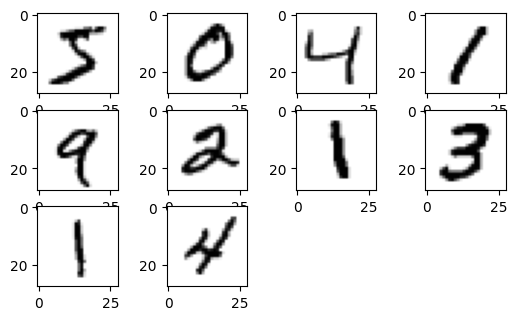

In [10]:
x=1
for i in range(10):
    plt.subplot(4,4,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [11]:
# Preprocessing


In [12]:
from keras.utils import to_categorical

In [13]:
y_cat_tr=to_categorical(y_train)
y_cat_ts=to_categorical(y_test)

In [14]:
y_cat_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
x_train=x_train/255
x_test=x_test/255
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
# Model Building


In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Convolution2D,MaxPooling2D,Flatten

In [18]:
nn=Sequential()

In [19]:
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Flatten())

nn.add(Dense(300,activation='relu'))
nn.add(Dense(300,activation='relu'))
nn.add(Dense(300,activation='relu'))

nn.add(Dense(10,activation='softmax'))

In [20]:
from keras.callbacks import EarlyStopping

In [21]:
Early=EarlyStopping(monitor='val_loss',patience=3)

In [22]:
# Compile

In [23]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
# Fitting The Model


In [25]:
hist=nn.fit(x_train,y_cat_tr,validation_split=0.2,callbacks=[Early],epochs=5)

Epoch 1/5
1500/1500 [==============================] - 33s 21ms/step - loss: 0.1959 - accuracy: 0.9391 - val_loss: 0.0743 - val_accuracy: 0.9773
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.0893 - val_accuracy: 0.9747
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0721 - accuracy: 0.9781 - val_loss: 0.0608 - val_accuracy: 0.9820
Epoch 4/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0510 - val_accuracy: 0.9862
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0506 - val_accuracy: 0.9854


In [26]:
# Visualize the Result


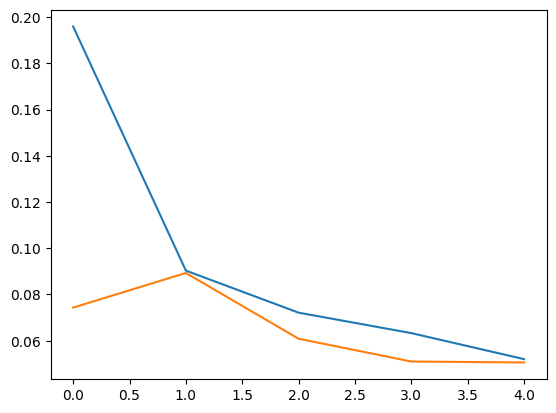

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['accuracy'])

In [28]:
# Evaluation


In [29]:
# Testing Data Evaluation

In [30]:
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix

In [31]:
y_pred=nn.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [32]:
y_pred


array([[2.3432769e-16, 7.0241326e-12, 1.8651979e-11, ..., 9.9999982e-01,
        2.5201148e-12, 7.9702026e-08],
       [7.8129659e-08, 2.5845022e-04, 9.9973929e-01, ..., 1.9391707e-06,
        1.0950125e-07, 1.7667617e-10],
       [5.8038036e-12, 9.9999946e-01, 1.4244064e-08, ..., 2.0277311e-09,
        3.1988611e-07, 7.9200353e-09],
       ...,
       [3.7283932e-13, 1.2881827e-07, 6.0276464e-09, ..., 3.4485968e-08,
        9.8919838e-07, 1.1207590e-06],
       [4.9181284e-11, 1.4397193e-12, 5.6603611e-12, ..., 5.2599827e-11,
        1.4804798e-04, 1.3517098e-08],
       [1.2104232e-07, 6.2713545e-09, 2.1167004e-09, ..., 1.5302436e-11,
        9.1157958e-08, 3.4112830e-09]], dtype=float32)

In [33]:
import numpy as np

In [34]:
y_pred1=np.argmax(y_pred,axis=-1)
y_pred1

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
acc=accuracy_score(y_pred1,y_test)
clf=classification_report(y_pred1,y_test)
cnf=multilabel_confusion_matrix(y_pred1,y_test)

print('Accuracy:',acc)
print('classification_report:\n',clf)
print('Confusion_matrix:\n',cnf)

Accuracy: 0.9872
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       984
           1       1.00      0.98      0.99      1156
           2       0.97      0.99      0.98      1010
           3       0.98      0.99      0.99       999
           4       0.98      0.99      0.99       972
           5       0.99      1.00      0.99       881
           6       0.98      1.00      0.99       944
           7       0.99      0.97      0.98      1043
           8       0.99      0.98      0.99       982
           9       0.99      0.97      0.98      1029

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion_matrix:
 [[[9012    4]
  [   8  976]]

 [[8842    2]
  [  23 1133]]

 [[8962   28]
  [   6 1004]]

 [[8985   16]
  [   5  994]]

 [[9011   17]
  [   7  965]]

 [[9106   13]
  [   2  879]]

 

In [37]:
# Unseen Data Evaluation


In [45]:
import cv2

In [47]:
img=cv2.imread('/Example_7.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[255, 253, 255, 251, 255, 255, 252, 255, 255, 253, 252, 254, 255,
        255, 255, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 253, 255, 255, 254, 252, 255, 250, 255, 251, 255, 255, 248,
        255, 254, 255, 255, 255, 255, 253, 255, 255, 252, 255, 255, 255,
        255, 255],
       [251, 255, 253, 251, 255, 254, 254, 255, 254, 255, 250, 255, 255,
        255, 252, 255, 254, 248, 255, 255, 254, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 249, 183,  34,   0,   0,  30, 153, 255, 253, 254, 255,
        247, 255, 253, 255, 255, 255, 255, 254, 253, 255, 251, 255, 255,
        255, 255],
       [249, 255, 255,  31,   2,   2,   0,   3,   0,   2,   2,   1,   0,
          8,   0,   2,   0,  36, 156, 255, 255, 250, 255, 255, 255, 255,
        255, 255],
       [255, 252, 253, 135,   0,   0,   0,   0,   2,   0,   0,   5,   1,
          1,   0,   5,   5,   0,   5,  35, 134, 255, 254, 255, 255, 255,
        255, 255],
       [25

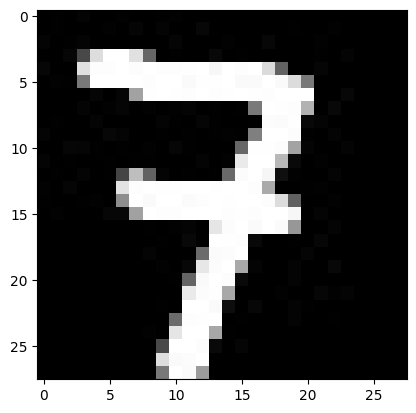

In [48]:
plt.imshow(img,plt.get_cmap('binary'))

In [49]:
img=~img
img

array([[  0,   2,   0,   4,   0,   0,   3,   0,   0,   2,   3,   1,   0,
          0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   1,   3,   0,   5,   0,   4,   0,   0,   7,
          0,   1,   0,   0,   0,   0,   2,   0,   0,   3,   0,   0,   0,
          0,   0],
       [  4,   0,   2,   4,   0,   1,   1,   0,   1,   0,   5,   0,   0,
          0,   3,   0,   1,   7,   0,   0,   1,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   6,  72, 221, 255, 255, 225, 102,   0,   2,   1,   0,
          8,   0,   2,   0,   0,   0,   0,   1,   2,   0,   4,   0,   0,
          0,   0],
       [  6,   0,   0, 224, 253, 253, 255, 252, 255, 253, 253, 254, 255,
        247, 255, 253, 255, 219,  99,   0,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   2, 120, 255, 255, 255, 255, 253, 255, 255, 250, 254,
        254, 255, 250, 250, 255, 250, 220, 121,   0,   1,   0,   0,   0,
          0,   0],
       [  

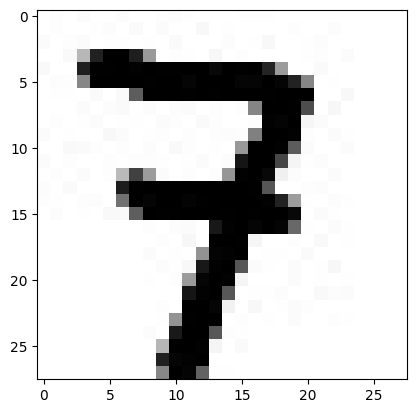

In [50]:
plt.imshow(img,plt.get_cmap('binary'))

In [51]:
img1=img/255

In [52]:
img1

array([[0.        , 0.00784314, 0.        , 0.01568627, 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.00784314,
        0.01176471, 0.00392157, 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00784314, 0.        , 0.        , 0.00392157,
        0.01176471, 0.        , 0.01960784, 0.        , 0.01568627,
        0.        , 0.        , 0.02745098, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.01568627, 0.        , 0.00784314, 0.01568627, 0.        ,
        0.00392157, 0.00392157, 0.        , 0.00392157, 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.0039

In [53]:
img2=np.array([img1])
img2

array([[[0.        , 0.00784314, 0.        , 0.01568627, 0.        ,
         0.        , 0.01176471, 0.        , 0.        , 0.00784314,
         0.01176471, 0.00392157, 0.        , 0.        , 0.        ,
         0.00392157, 0.00392157, 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.00784314, 0.        , 0.        , 0.00392157,
         0.01176471, 0.        , 0.01960784, 0.        , 0.01568627,
         0.        , 0.        , 0.02745098, 0.        , 0.00392157,
         0.        , 0.        , 0.        , 0.        , 0.00784314,
         0.        , 0.        , 0.01176471, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.01568627, 0.        , 0.00784314, 0.01568627, 0.        ,
         0.00392157, 0.00392157, 0.        , 0.00392157, 0.        ,
         0.01960784, 0.        , 0.        , 0.        , 0.01176471,
         0.

In [55]:
result=nn.predict(img2)

1/1 [==============================] - 0s 22ms/step


In [56]:
result

array([[3.2625286e-13, 2.8915795e-07, 1.0214466e-06, 6.3821053e-06,
        3.1899998e-07, 1.6028441e-11, 1.8667558e-14, 9.9999118e-01,
        1.2045386e-08, 8.4442104e-07]], dtype=float32)

In [57]:
np.argmax(result,axis=-1)

array([7])